We have discussed differential gene expression analysis in one of our previous recipes. Another popular pipeline for the purpose is provided by the limma software package, which we saw in Chapter 5, Analyzing Microarray Data with R. It can handle multiple experiments via Empirical Bayes statistical methods and uses normalized read counts for each gene. This recipe will explain the use of the limma package from Bioconductor for differential gene analysis with NGS data.

在前面的教程中我们讨论了基因差异性表达分析。另外一个常用的是limma软件包。在第五章的时候，用R分析微阵列数据有用到limma。它可以通过贝叶斯统计方法处理多个实验，并对每个基因规范化读取。本教程解释limma包在NGS数据分析差异基因时的使用。

1. Start with the input data, which can be loaded as a package from Bioconductor, as follows:

 加载DESeq，导入数据：

In [1]:
source("http://bioconductor.org/biocLite.R")
biocLite(c("DESeq"))

Bioconductor version 3.7 (BiocInstaller 1.30.0), ?biocLite for help
A newer version of Bioconductor is available for this version of R,
  ?BiocUpgrade for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.7 (BiocInstaller 1.30.0), R 3.5.1 (2018-07-02).
Installing package(s) 'DESeq'
also installing the dependency 'geneplotter'



package 'geneplotter' successfully unpacked and MD5 sums checked
package 'DESeq' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\Rtmpgn3MuO\downloaded_packages


Old packages: 'ade4', 'ape', 'backports', 'BH', 'BiocManager', 'broom',
  'callr', 'caret', 'checkpoint', 'class', 'cli', 'clipr', 'codetools',
  'colorspace', 'curl', 'data.table', 'dbplyr', 'ddalpha', 'digest', 'dimRed',
  'doParallel', 'dplyr', 'evaluate', 'fansi', 'forcats', 'foreign', 'geometry',
  'ggplot2', 'haven', 'htmlwidgets', 'httpuv', 'httr', 'igraph', 'ipred',
  'IRdisplay', 'IRkernel', 'jsonlite', 'kernlab', 'knitr', 'later', 'lattice',
  'lava', 'magic', 'markdown', 'MASS', 'Matrix', 'mgcv', 'mime', 'MKmisc',
  'ModelMetrics', 'modelr', 'openssl', 'pillar', 'pkgconfig', 'pls',
  'processx', 'purrr', 'R.utils', 'R6', 'Rcpp', 'readr', 'readxl', 'recipes',
  'repr', 'reprex', 'rlang', 'rmarkdown', 'robustbase', 'rstudioapi', 'RUnit',
  'scales', 'sfsmisc', 'shiny', 'stringi', 'stringr', 'survival', 'testthat',
  'tibble', 'tidyr', 'tidyselect', 'tinytex', 'TTR', 'xfun', 'XML', 'xtable',
  'xts', 'zoo'


In [2]:
biocLite(c("pasilla"))

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.7 (BiocInstaller 1.30.0), R 3.5.1 (2018-07-02).
Installing package(s) 'pasilla'
installing the source package 'pasilla'

Old packages: 'ade4', 'ape', 'backports', 'BH', 'BiocManager', 'broom',
  'callr', 'caret', 'checkpoint', 'class', 'cli', 'clipr', 'codetools',
  'colorspace', 'curl', 'data.table', 'dbplyr', 'ddalpha', 'digest', 'dimRed',
  'doParallel', 'dplyr', 'evaluate', 'fansi', 'forcats', 'foreign', 'geometry',
  'ggplot2', 'haven', 'htmlwidgets', 'httpuv', 'httr', 'igraph', 'ipred',
  'IRdisplay', 'IRkernel', 'jsonlite', 'kernlab', 'knitr', 'later', 'lattice',
  'lava', 'magic', 'markdown', 'MASS', 'Matrix', 'mgcv', 'mime', 'MKmisc',
  'ModelMetrics', 'modelr', 'openssl', 'pillar', 'pkgconfig', 'pls',
  'processx', 'purrr', 'R.utils', 'R6', 'Rcpp', 'readr', 'readxl', 'recipes',
  'repr', 'reprex', 'rlang', 'rmarkdown', 'robustbase', 'rstudioapi', 'RUnit',
  'scales', 'sfsmisc', 'shiny', 'stringi', 'stringr', 'survival

In [4]:
library(limma)

In [5]:
library(DESeq)

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from 'package:limma':

    plotMA

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table, tapply, union, unique,
    unsplit, which, which.max, which.mi

In [6]:
library(pasilla)

In [8]:
data(pasillaGenes)

2. Check the data content as follows:

 检查数据内容：

In [9]:
pasillaGenes

CountDataSet (storageMode: environment)
assayData: 14470 features, 7 samples 
  element names: counts 
protocolData: none
phenoData
  sampleNames: treated1fb treated2fb ... untreated4fb (7 total)
  varLabels: sizeFactor condition type
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
  pubMedIds: 20921232 
Annotation:  

3. Now, create an expression set using the counts from the pasillaGenes dataset
as follows:

 创建一个ExpressionSet：

In [11]:
eset <- counts(pasillaGenes)

4. You have seven samples in the dataset; the first three are the treatment samples and the last four are controls. Assign this to your eset data as follows:

 数据集中含有几个样本，三个是处理组样本、四个是对照组样本。将其分配到eset数据中：

In [12]:
colnames(eset) <- c(paste("T", 1:3, sep="_"), paste("C", 1:4,sep="_"))

5. Take a look at the data by typing the following command:

 查看数据：

In [13]:
head(eset)

,T_1,T_2,T_3,C_1,C_2,C_3,C_4
FBgn0000003,0,0,1,0,0,0,0
FBgn0000008,78,46,43,47,89,53,27
FBgn0000014,2,0,0,0,0,1,0
FBgn0000015,1,0,1,0,1,1,2
FBgn0000017,3187,1672,1859,2445,4615,2063,1711
FBgn0000018,369,150,176,288,383,135,174


6. Now, create a design matrix as follows:

 创建一个矩阵：

In [14]:
design <- cbind(Intercept=1,trt=c(1,1,1,0,0,0,0))

7. Now, perform a voom transformation using the experiment design matrix as follows:
 
 使用实验design矩阵voom转化：

In [15]:
eset_voom <- voom(eset, design, plot=FALSE)

8. Fit a linear model on your eset data and design matrix as follows:

 在eset数据和设计矩阵上拟合一个线性模型如下:

In [16]:
fit <- lmFit(eset_voom,design)

9. To perform the computation of statistics, use the following eBayes function:
 
 进行数据统计计算，用eBayes函数：

In [17]:
fitE <- eBayes(fit)

10. Now, to find the top genes and filter them based on the corresponding p-values, type the following commands:
 
 找到the top genes 并根据相应的p值进行筛选：

In [18]:
topAll <- topTable(fitE, n=nrow(eset), coef = 2, adjust = "BH")

In [19]:
DEgenes <- rownames(topAll[which(topAll$adj.P.Val<0.05),])

The plot shown in the following screenshot shows a histogram of the tags with different ranges of p-values and a volcano plot for the limma analysis. The code to generate these plots is as follows:

下图所示的图显示了具有不同p值范围的标签的直方图和用于limma分析的火山图。生成这些图的代码如下:

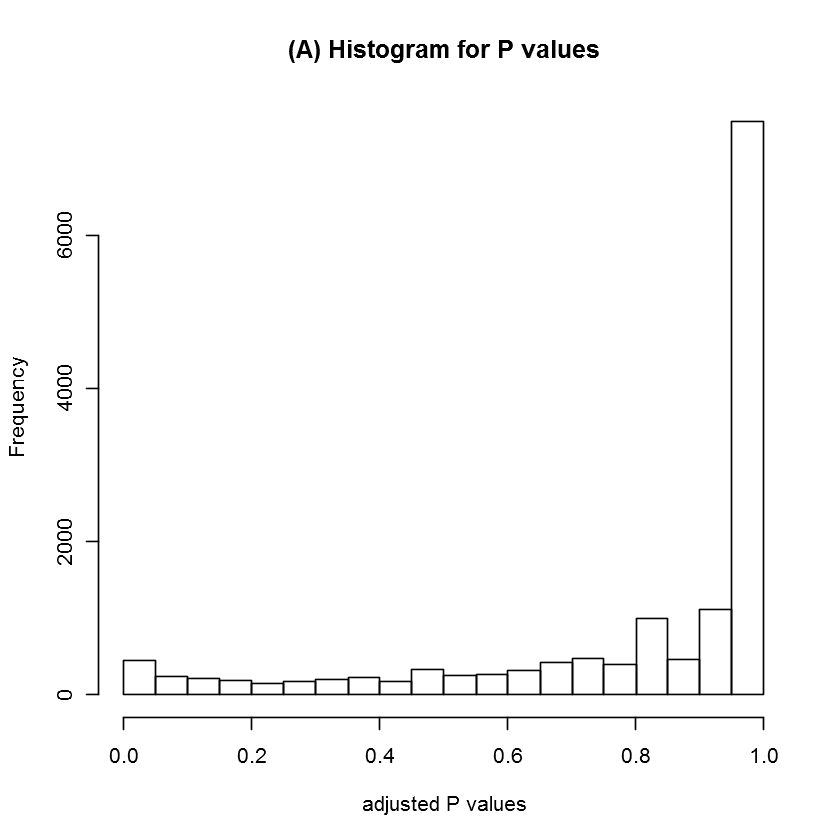

In [20]:
hist(topAll$adj.P.Val, xlab="adjusted P values",main="(A) Histogram for P values")

In [21]:
clr <- rep("black",nrow(topAll)) # creates a vector for color

In [22]:
clr[which(topAll$adj.P.Val<0.05)] <- "red"# sets color for DE to red

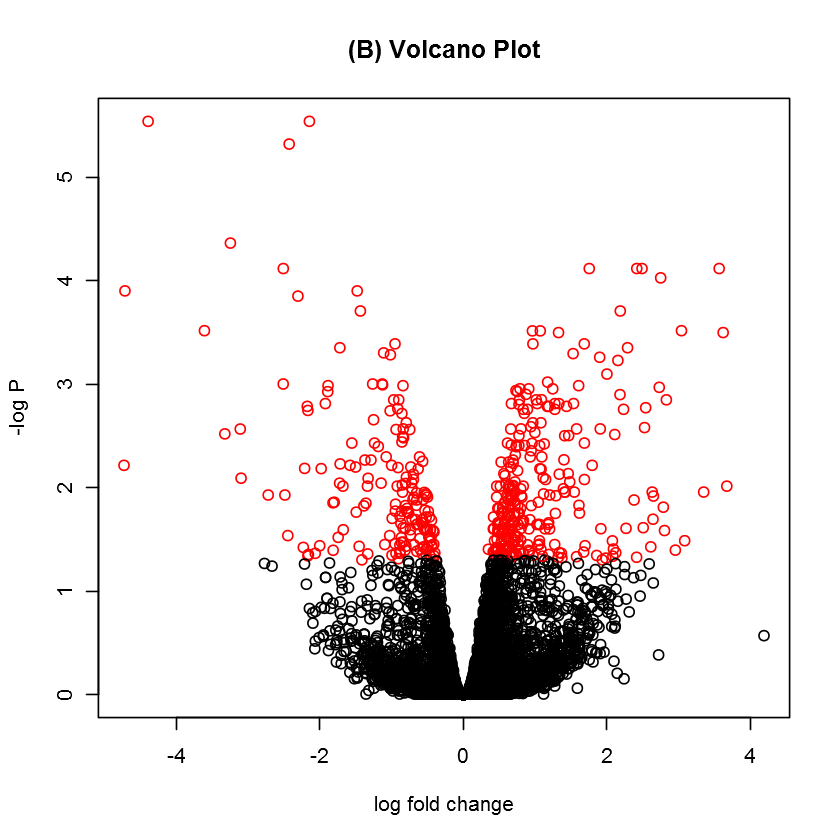

In [23]:
plot(x = topAll$logFC, y = -log10(topAll$adj.P.Val), col = clr, xlab= "log fold change", ylab = "-log P",main = "(B) Volcano Plot") # Do a volcano plot